#Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#Loading the dataset

In [ ]:
df = pd.read_csv('mushroom.csv')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,...,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,...,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,3473
cap-surface,3479
cap-color,3459
ruises,3472
odor,3450
gill-attachment,3481
gill-spacing,3399
gill-size,3492
gill-color,3568


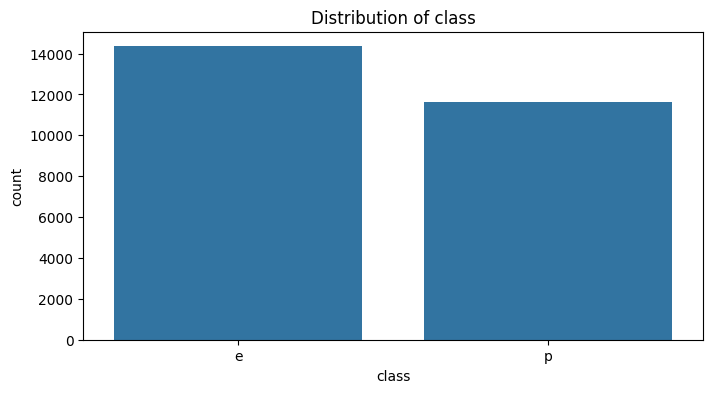

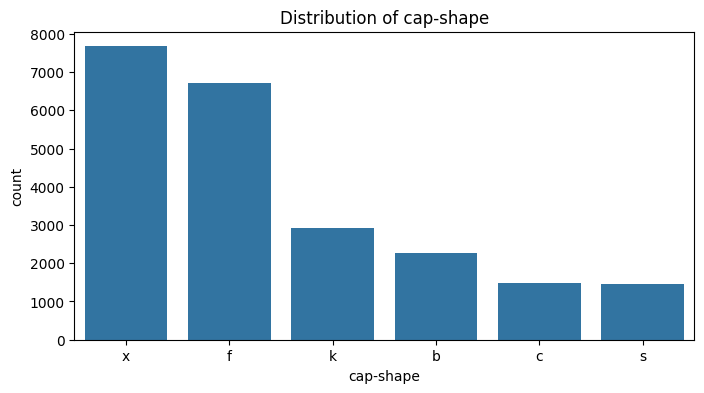

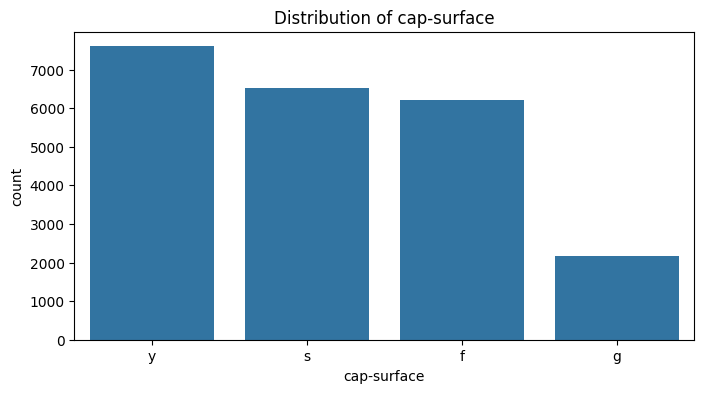

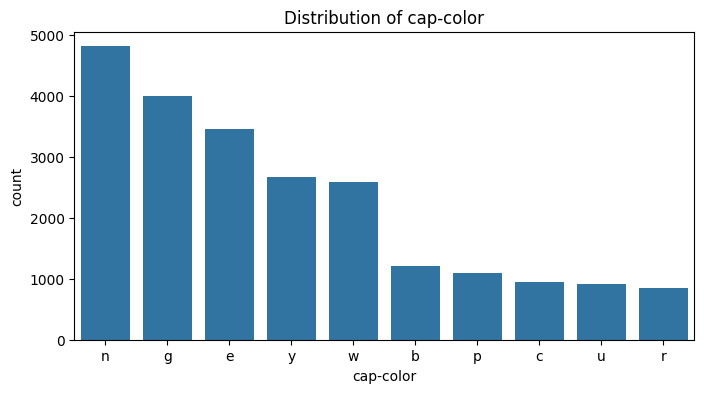

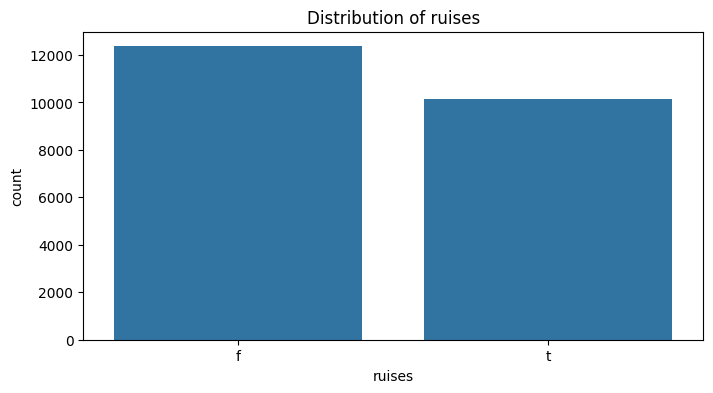

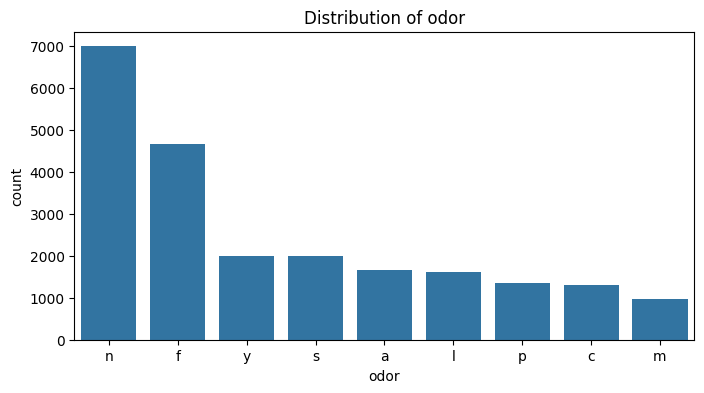

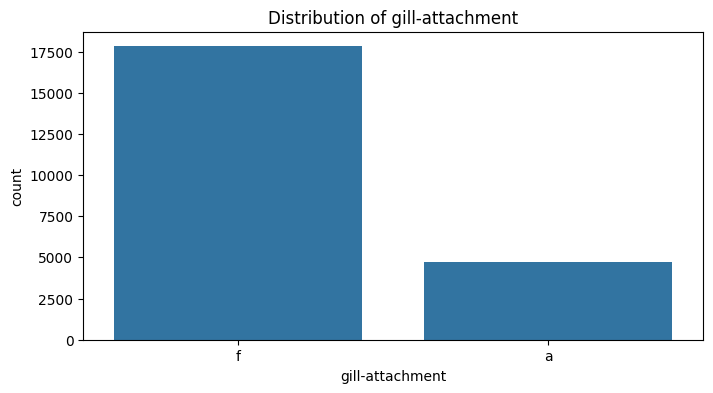

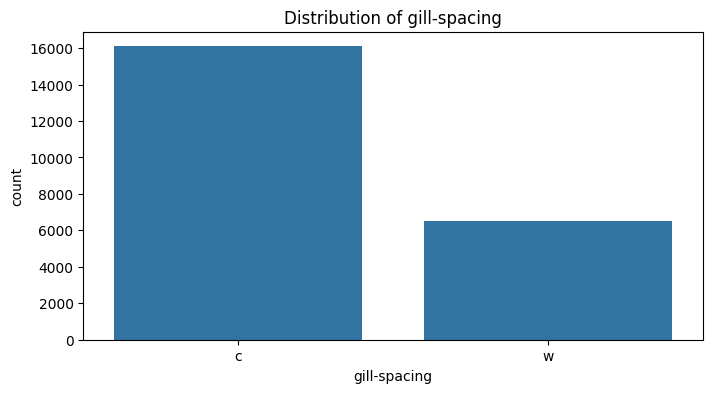

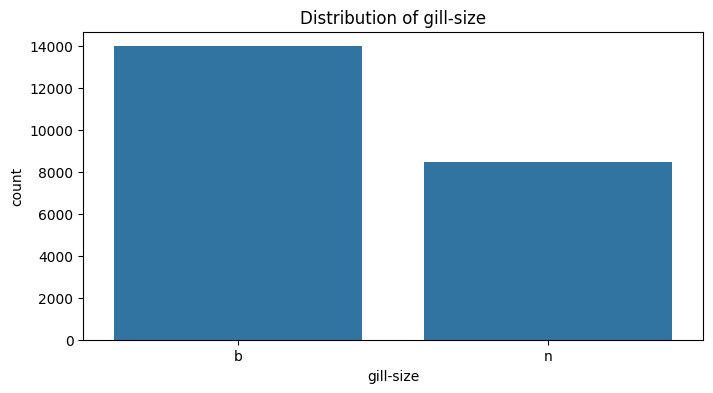

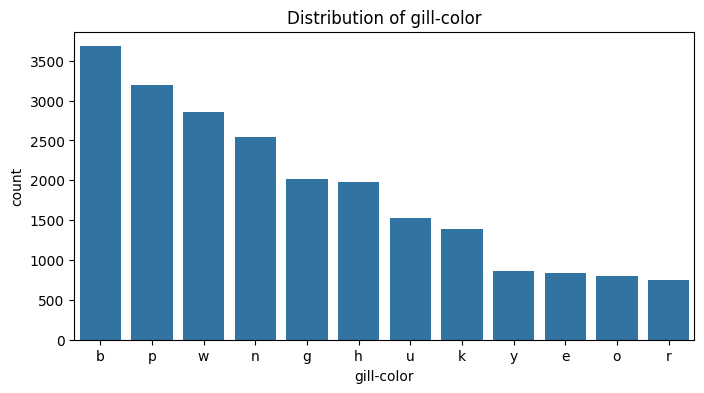

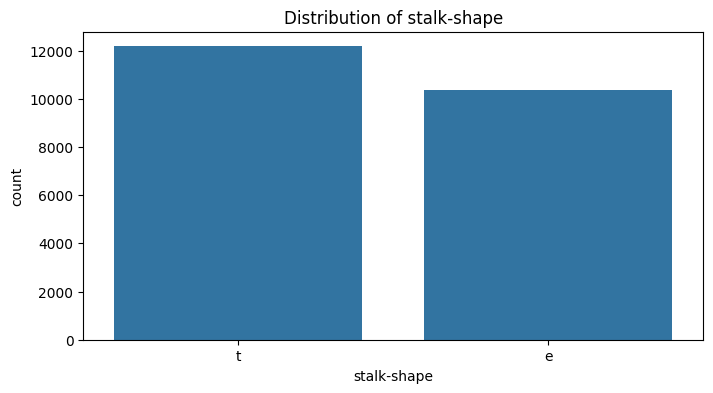

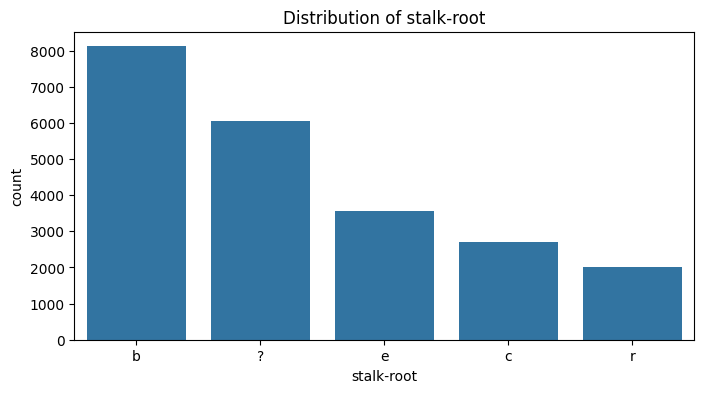

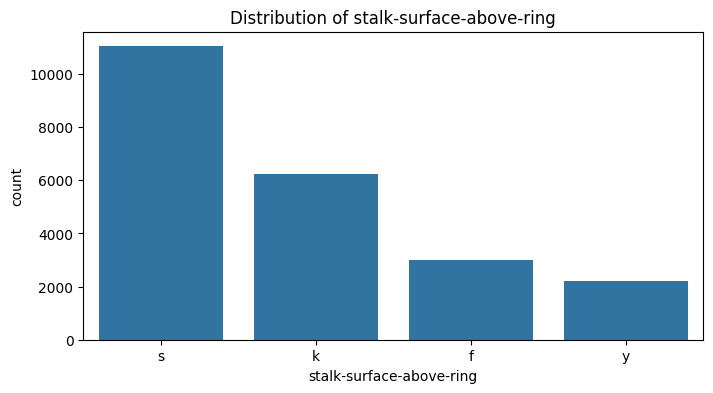

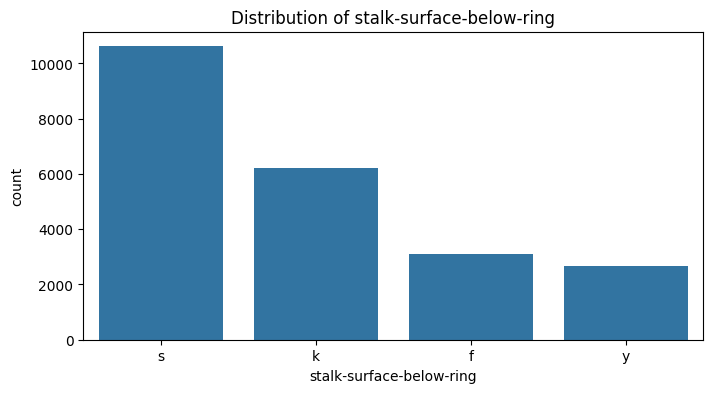

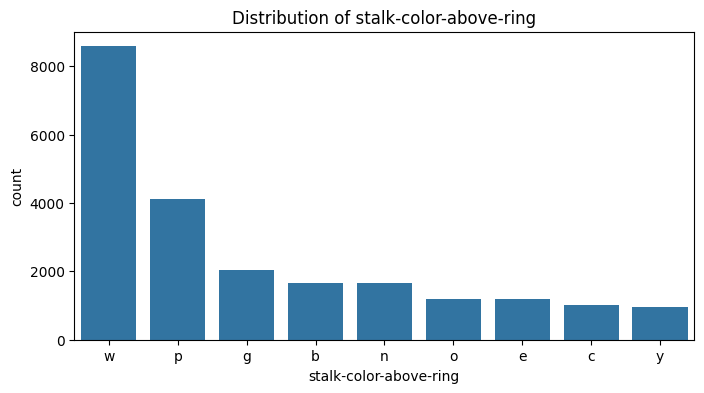

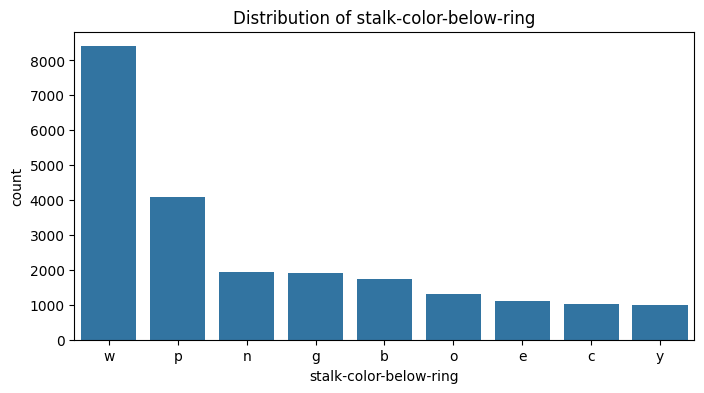

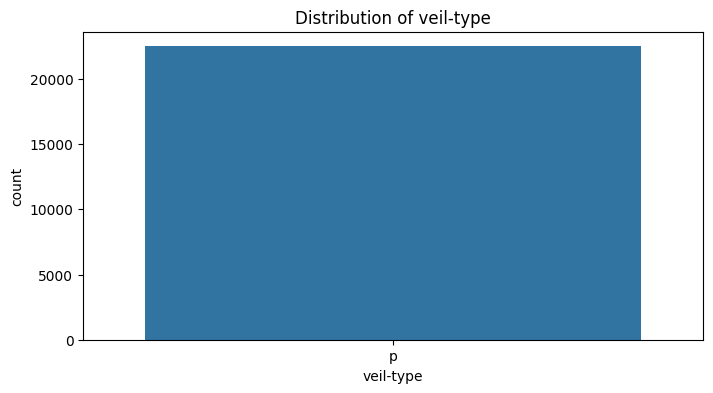

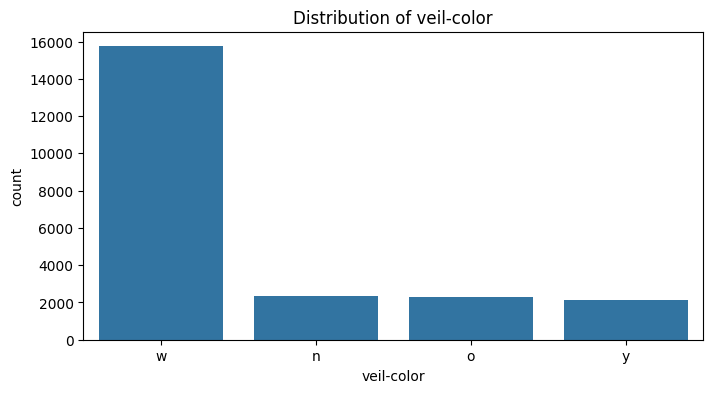

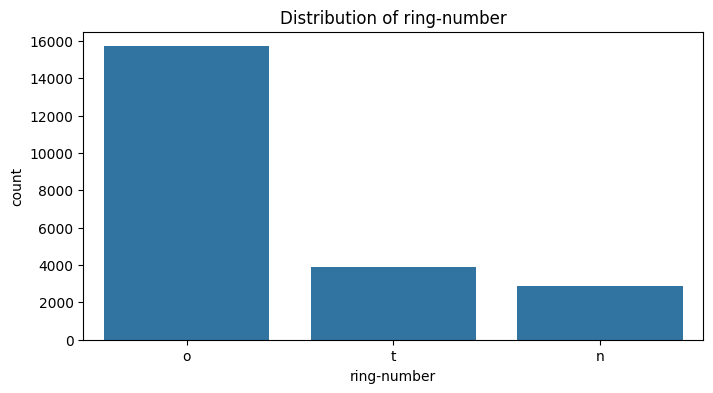

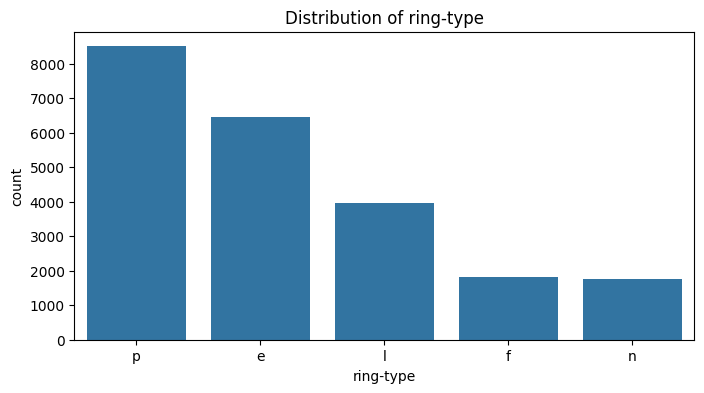

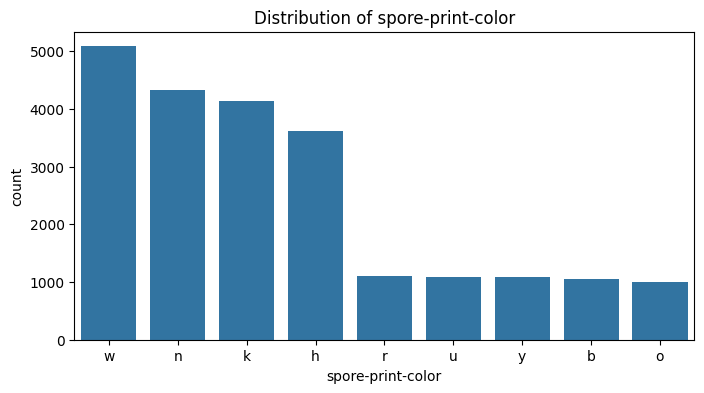

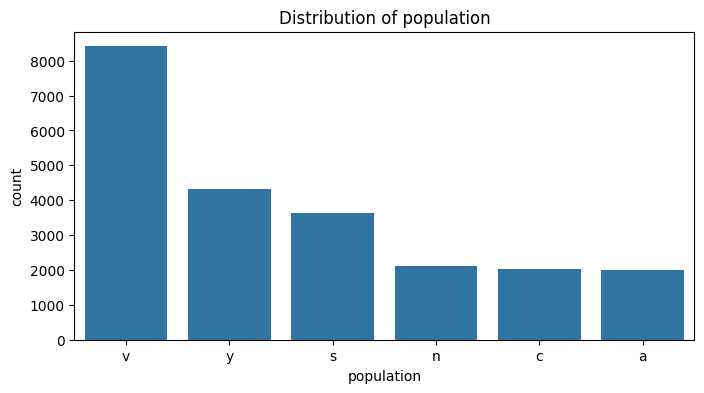

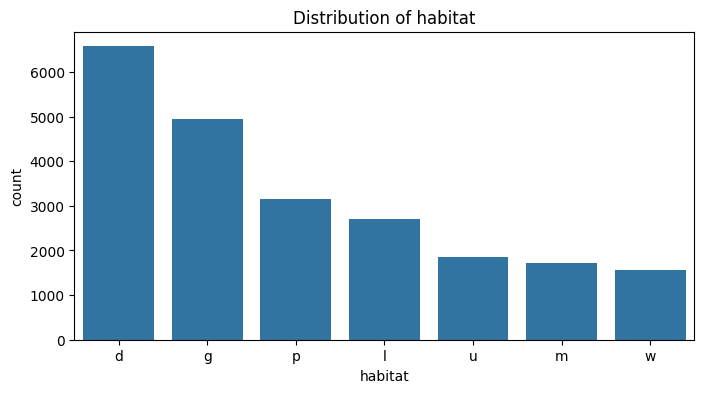

In [ ]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
for col in df.columns:
    if col != 'class':  # skipping the class column, since it is the column getting grouped by
        grouped = df.groupby('class')[col].value_counts().unstack(fill_value=0)
        print(grouped)

cap-shape     b    c     f     k    s     x
class                                      
e          1336  802  3649  1542  812  4320
p           924  675  3073  1370  656  3354
cap-surface     f     g     s     y
class                              
e            3670  1195  3488  4085
p            2554   966  3032  3517
cap-color    b    c     e     g     n    p    r    u     w     y
class                                                           
e          660  526  1834  2226  2673  611  467  502  1452  1460
p          551  413  1627  1765  2137  483  380  413  1137  1210
ruises     f     t
class             
e       6293  6176
p       6068  3977
odor      a    c     f    l    m     n    p     s     y
class                                                  
e      1027  626   700  951  546  6284  617   834   889
p       643  671  3954  659  426   702  742  1153  1112
gill-attachment     a     f
class                      
e                2599  9857
p                2095  7954
gill-spa

#Preprocessing

In [ ]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.shape

(25986, 23)

In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
ruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
le = LabelEncoder()
for col in df.columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

,0
class,int64
cap-shape,int64
cap-surface,int64
cap-color,int64
ruises,int64
odor,int64
gill-attachment,int64
gill-spacing,int64
gill-size,int64
gill-color,int64


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,0,4,0,5,1,1,1,0,...,3,7,6,0,0,1,4,7,4,0
1,1,5,3,3,1,5,1,0,0,4,...,2,4,1,0,2,0,0,7,5,1
2,0,0,3,4,1,5,1,0,0,5,...,2,6,7,0,2,1,4,0,5,6
3,0,5,1,3,1,5,1,1,0,5,...,2,6,7,0,2,0,3,7,4,0
4,0,5,0,4,1,5,0,1,1,5,...,1,7,7,0,2,1,2,7,4,0


#Training and testing

##Baseline Model

In [ ]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear','saga']}

lr_grid_search = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, return_train_score=True)
lr_grid_search.fit(X_train, y_train)

results = pd.DataFrame(lr_grid_search.cv_results_)

results_table = results[['param_C', 'param_penalty','param_solver', 'mean_train_score', 'mean_test_score']].copy()
results_table.columns = ['C (Regularization Strength)', 'Penalty Type','Solver', 'Mean Train Score', 'Mean Test Score']

print("Logistic Regression Hyperparameter Performance:")
print(results_table)

print("\nLogistic Regression Best Hyperparameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)

lr_y_pred = lr_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Hyperparameter Performance:
    C (Regularization Strength) Penalty Type     Solver  Mean Train Score  \
0                         0.001           l1  liblinear          0.552666   
1                         0.001           l1       saga          0.573708   
2                         0.001           l2  liblinear          0.615998   
3                         0.001           l2       saga          0.620836   
4                         0.010           l1  liblinear          0.609868   
5                         0.010           l1       saga          0.618430   
6                         0.010           l2  liblinear          0.616135   
7                         0.010           l2       saga          0.617455   
8                         0.100           l1  liblinear          0.617235   
9                         0.100           l1       saga          0.616974   
10                        0.100           l2  liblinear          0.617029   
11                        0.

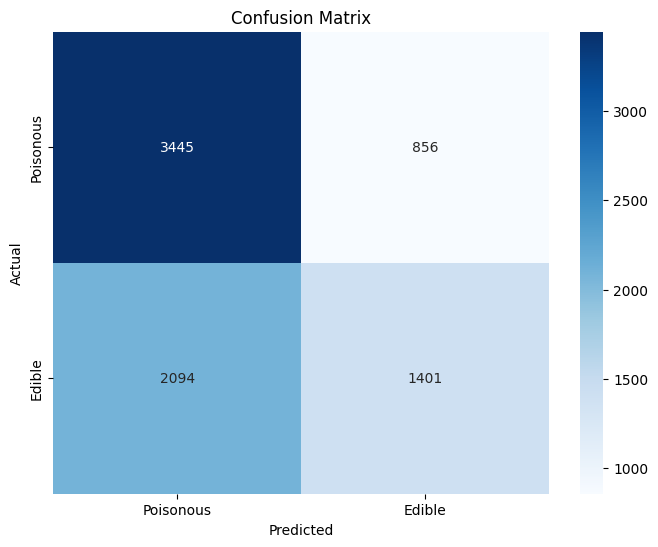

In [ ]:
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Poisonous", "Edible"],
            yticklabels=["Poisonous", "Edible"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Decision tree

In [ ]:
dt_param_grid = {'criterion' : ['gini', 'entropy'],'max_depth': [3, 5, 7]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, return_train_score=True)
dt_grid_search.fit(X_train, y_train)
results = pd.DataFrame(dt_grid_search.cv_results_)

results_table = results[['param_criterion', 'param_max_depth','mean_train_score', 'mean_test_score']].copy()
results_table.columns = ['Criterion', 'Max Depth','mean_train_score','Mean Test Score']

print("Decision Tree Hyperparameter Performance:")
print(results_table)

print("\nDecision Tree Best Hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)
dt_y_pred = dt_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

Decision Tree Hyperparameter Performance:
  Criterion  Max Depth  mean_train_score  Mean Test Score
0      gini          3          0.709978         0.709291
1      gini          5          0.726553         0.716767
2      gini          7          0.746207         0.714788
3   entropy          3          0.709978         0.709291
4   entropy          5          0.726251         0.717097
5   entropy          7          0.744406         0.717647

Decision Tree Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Decision Tree Best Score: 0.7176470588235294

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      4301
           1       0.71      0.62      0.67      3495

    accuracy                           0.72      7796
   macro avg       0.72      0.71      0.71      7796
weighted avg       0.72      0.72      0.72      7796



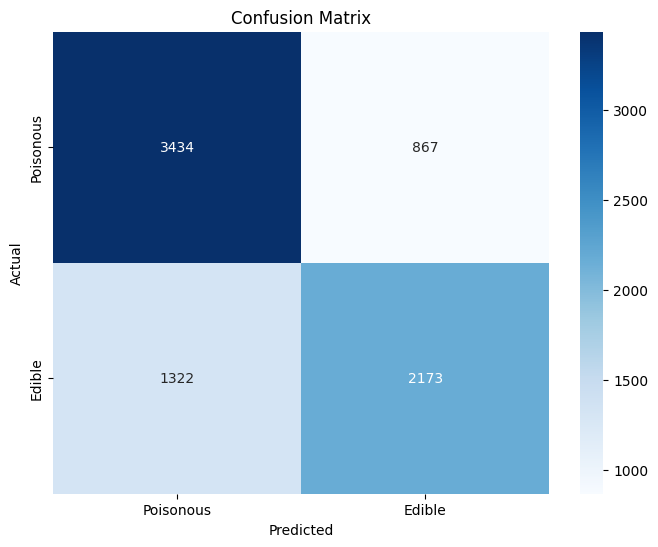

In [ ]:
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Poisonous", "Edible"],
            yticklabels=["Poisonous", "Edible"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dt_y_prob = dt_grid_search.predict_proba(X_test)[:, 1]

dt_roc_auc = roc_auc_score(y_test, dt_y_prob)

print("Decision Tree ROC-AUC Score:", dt_roc_auc)

Decision Tree ROC-AUC Score: 0.7774969989013435


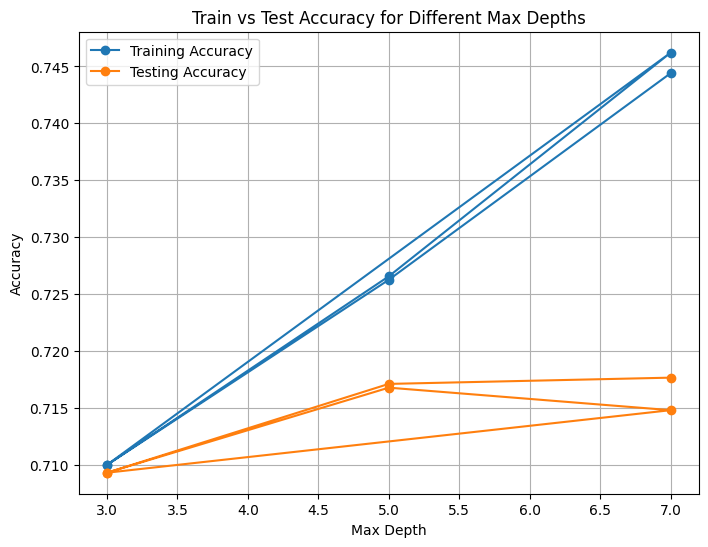

Decision Tree Hyperparameter Performance:
  Criterion  Max Depth  mean_train_score  Mean Test Score
0      gini          3          0.709978         0.709291
1      gini          5          0.726553         0.716767
2      gini          7          0.746207         0.714788
3   entropy          3          0.709978         0.709291
4   entropy          5          0.726251         0.717097
5   entropy          7          0.744406         0.717647

Decision Tree Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Decision Tree Best Score: 0.7176470588235294

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      4301
           1       0.71      0.62      0.67      3495

    accuracy                           0.72      7796
   macro avg       0.72      0.71      0.71      7796
weighted avg       0.72      0.72      0.72      7796



In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(results_table['Max Depth'], results_table['mean_train_score'], label='Training Accuracy', marker='o')

plt.plot(results_table['Max Depth'], results_table['Mean Test Score'], label='Testing Accuracy', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Max Depths')

plt.legend()

plt.grid(True)
plt.show()

print("Decision Tree Hyperparameter Performance:")
print(results_table)

print("\nDecision Tree Best Hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)

dt_y_pred = dt_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

##Random forest

In [ ]:
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],'max_features' : ['sqrt', 'log2']}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, return_train_score=True)
rf_grid_search.fit(X_train, y_train)
results = pd.DataFrame(rf_grid_search.cv_results_)

results_table = results[['param_n_estimators', 'param_max_depth', 'param_max_features',
                         'mean_train_score','mean_test_score']].copy()
results_table.columns = ['N Estimators', 'Max Depth', 'Max Features','mean_train_score', 'Mean Test Score']

print("Random Forest Hyperparameter Performance:")
print(results_table)

print("\nRandom Forest Best Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)
rf_y_pred = rf_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Hyperparameter Performance:
    N Estimators Max Depth Max Features  mean_train_score  Mean Test Score
0             50      None         sqrt          0.999835         0.723914
1            100      None         sqrt          1.000000         0.728917
2            200      None         sqrt          1.000000         0.729137
3             50      None         log2          0.999835         0.723914
4            100      None         log2          1.000000         0.728917
5            200      None         log2          1.000000         0.729137
6             50        10         sqrt          0.828244         0.727598
7            100        10         sqrt          0.830456         0.729797
8            200        10         sqrt          0.832229         0.729467
9             50        10         log2          0.828244         0.727598
10           100        10         log2          0.830456         0.729797
11           200        10         log2          0.832229 

In [ ]:
rf_y_prob = rf_grid_search.predict_proba(X_test)[:, 1]

rf_roc_auc = roc_auc_score(y_test, rf_y_prob)

print("Random Forest ROC-AUC Score:", rf_roc_auc)

Random Forest ROC-AUC Score: 0.7939605820784268


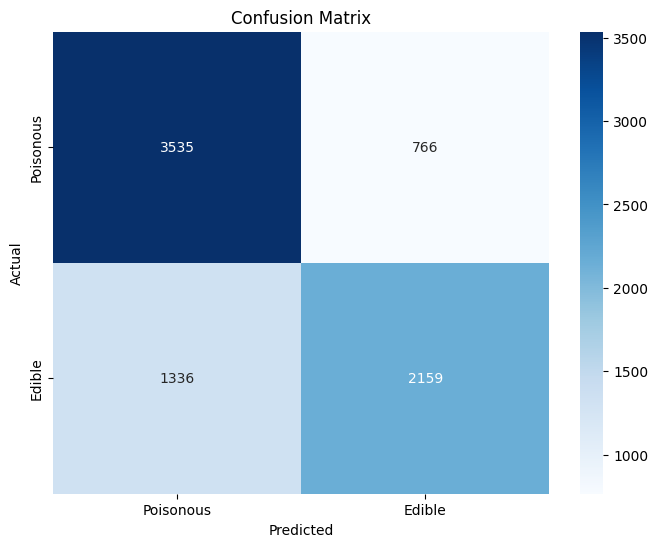

In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Poisonous", "Edible"],
            yticklabels=["Poisonous", "Edible"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

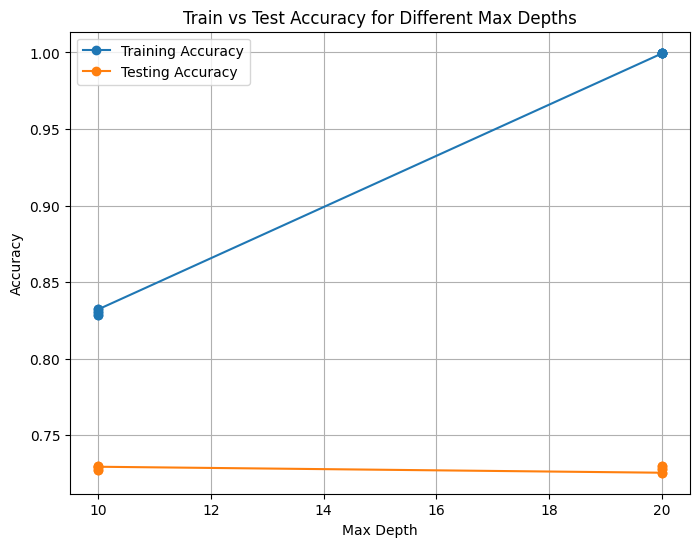

RF Hyperparameter Performance:
    N Estimators Max Depth Max Features  mean_train_score  Mean Test Score
0             50      None         sqrt          0.999835         0.723914
1            100      None         sqrt          1.000000         0.728917
2            200      None         sqrt          1.000000         0.729137
3             50      None         log2          0.999835         0.723914
4            100      None         log2          1.000000         0.728917
5            200      None         log2          1.000000         0.729137
6             50        10         sqrt          0.828244         0.727598
7            100        10         sqrt          0.830456         0.729797
8            200        10         sqrt          0.832229         0.729467
9             50        10         log2          0.828244         0.727598
10           100        10         log2          0.830456         0.729797
11           200        10         log2          0.832229         0.7

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(results_table['Max Depth'], results_table['mean_train_score'], label='Training Accuracy', marker='o')

plt.plot(results_table['Max Depth'], results_table['Mean Test Score'], label='Testing Accuracy', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Max Depths')

plt.legend()

plt.grid(True)
plt.show()

print("RF Hyperparameter Performance:")
print(results_table)

print("\nRF Best Hyperparameters:", rf_grid_search.best_params_)
print("RF Best Score:", rf_grid_search.best_score_)

rf_y_pred = rf_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

##Gradient boosting

In [ ]:
gb_param_grid = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 1],'max_depth': [3, 5, 7]}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, return_train_score=True)
gb_grid_search.fit(X_train, y_train)
results = pd.DataFrame(gb_grid_search.cv_results_)

results_table = results[['param_n_estimators', 'param_learning_rate', 'param_max_depth',
                         'mean_train_score','mean_test_score']].copy()
results_table.columns = ['N Estimators', 'Learning Rate', 'Max Depth','mean_train_score', 'Mean Test Score']

print("Gradient Boosting Hyperparameter Performance:")
print(results_table)

print("\nGradient Boosting Best Hyperparameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best Score:", gb_grid_search.best_score_)
gb_y_pred = gb_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Hyperparameter Performance:
    N Estimators  Learning Rate  Max Depth  mean_train_score  Mean Test Score
0             50           0.01          3          0.706872         0.706872
1            100           0.01          3          0.716012         0.715503
2            200           0.01          3          0.728587         0.726223
3             50           0.01          5          0.722141         0.715723
4            100           0.01          5          0.737369         0.724849
5            200           0.01          5          0.748914         0.732930
6             50           0.01          7          0.753601         0.723145
7            100           0.01          7          0.772018         0.727708
8            200           0.01          7          0.790338         0.730126
9             50           0.10          3          0.745657         0.737163
10           100           0.10          3          0.753848         0.742496
11           200  

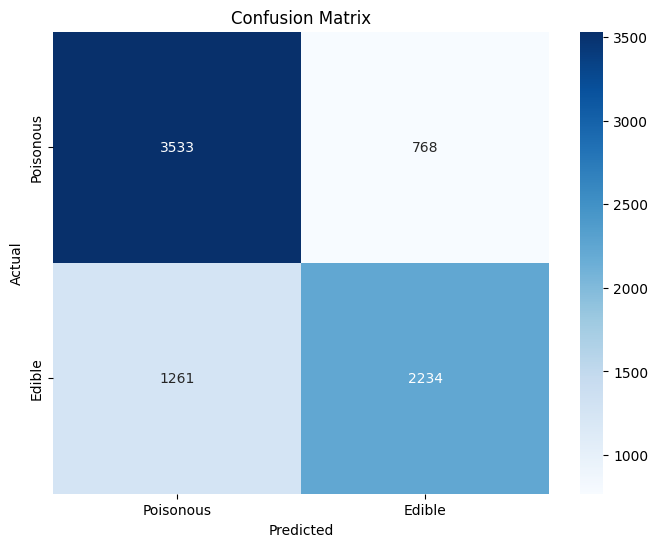

In [ ]:
cm = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Poisonous", "Edible"],
            yticklabels=["Poisonous", "Edible"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_y_prob = gb_grid_search.predict_proba(X_test)[:, 1]

gb_roc_auc = roc_auc_score(y_test, gb_y_prob)

print("Gradient Boosting ROC-AUC Score:", gb_roc_auc)

Gradient Boosting ROC-AUC Score: 0.8046307891933173


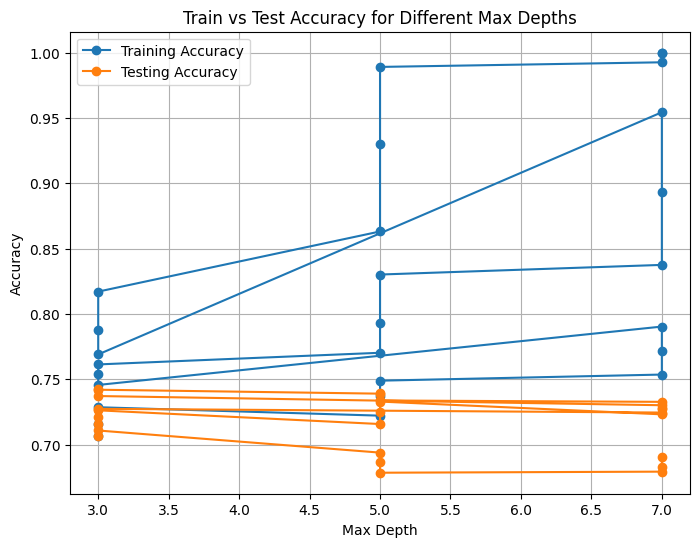

GB Hyperparameter Performance:
    N Estimators  Learning Rate  Max Depth  mean_train_score  Mean Test Score
0             50           0.01          3          0.706872         0.706872
1            100           0.01          3          0.716012         0.715503
2            200           0.01          3          0.728587         0.726223
3             50           0.01          5          0.722141         0.715723
4            100           0.01          5          0.737369         0.724849
5            200           0.01          5          0.748914         0.732930
6             50           0.01          7          0.753601         0.723145
7            100           0.01          7          0.772018         0.727708
8            200           0.01          7          0.790338         0.730126
9             50           0.10          3          0.745657         0.737163
10           100           0.10          3          0.753848         0.742496
11           200           0.10  

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(results_table['Max Depth'], results_table['mean_train_score'], label='Training Accuracy', marker='o')

plt.plot(results_table['Max Depth'], results_table['Mean Test Score'], label='Testing Accuracy', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Max Depths')

plt.legend()

plt.grid(True)
plt.show()

print("GB Hyperparameter Performance:")
print(results_table)

print("\nGB Best Hyperparameters:", gb_grid_search.best_params_)
print("GB Best Score:", gb_grid_search.best_score_)

gb_y_pred = gb_grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, gb_y_pred))

#Analysis of results

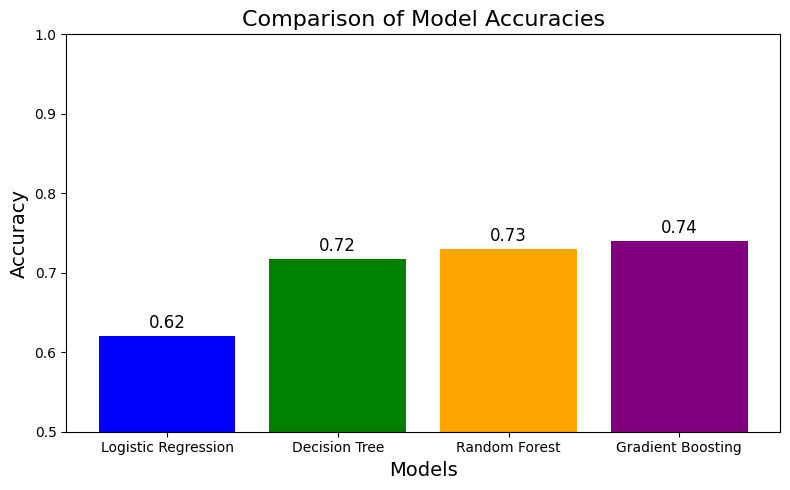

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [0.62, 0.717, 0.73, 0.74]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])

plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

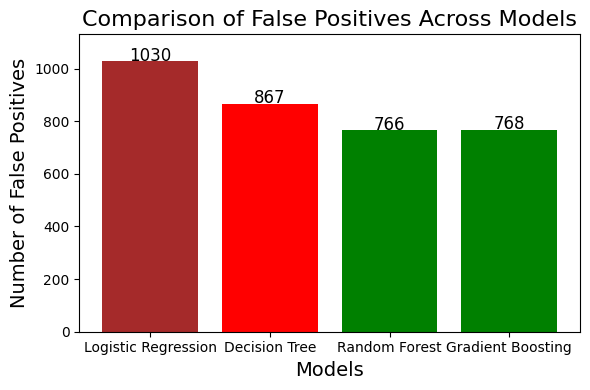

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
false_positives = [1030, 867, 766, 768]

plt.figure(figsize=(6, 4))
plt.bar(models, false_positives, color=['brown', 'red', 'green', 'green'])

plt.title('Comparison of False Positives Across Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Number of False Positives', fontsize=14)
plt.ylim(0, max(false_positives) + 100)

for i, fp in enumerate(false_positives):
    plt.text(i, fp + 0.5, f"{fp}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
dt_final = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dt_final.fit(X_train, y_train)
dt_final_y_pred = dt_final.predict(X_test)
print(classification_report(y_test, dt_final_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76      4301
           1       0.71      0.62      0.66      3495

    accuracy                           0.72      7796
   macro avg       0.72      0.71      0.71      7796
weighted avg       0.72      0.72      0.71      7796



In [ ]:
rf_final = RandomForestClassifier(random_state=42, n_estimators= 200, max_depth= 20,max_features = 'sqrt')
rf_final.fit(X_train, y_train)
rf_final_y_pred = rf_final.predict(X_test)
print(classification_report(y_test, rf_final_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      4301
           1       0.74      0.62      0.67      3495

    accuracy                           0.73      7796
   macro avg       0.73      0.72      0.72      7796
weighted avg       0.73      0.73      0.73      7796



In [ ]:
gb_final = GradientBoostingClassifier(random_state=42, n_estimators= 200,learning_rate= 0.1,max_depth= 3)
gb_final.fit(X_train, y_train)
gb_final_y_pred = gb_final.predict(X_test)
print(classification_report(y_test, gb_final_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      4301
           1       0.74      0.65      0.69      3495

    accuracy                           0.74      7796
   macro avg       0.74      0.73      0.74      7796
weighted avg       0.74      0.74      0.74      7796



In [ ]:
lr_results = pd.DataFrame(lr_grid_search.cv_results_)
dt_results = pd.DataFrame(dt_grid_search.cv_results_)
rf_results = pd.DataFrame(rf_grid_search.cv_results_)
gb_results = pd.DataFrame(gb_grid_search.cv_results_)

lr_table = lr_results[['param_C', 'param_penalty', 'mean_train_score', 'mean_test_score']].copy()
dt_table = dt_results[['param_max_depth', 'param_criterion', 'mean_train_score', 'mean_test_score']].copy()
rf_table = rf_results[['param_n_estimators', 'param_max_depth', 'mean_train_score', 'mean_test_score']].copy()
gb_table = gb_results[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_train_score', 'mean_test_score']].copy()

lr_table.columns = ['C (Regularization Strength)', 'Penalty Type', 'Mean Train Score', 'Mean Test Score']
dt_table.columns = ['Max Depth', 'Criterion', 'Mean Train Score', 'Mean Test Score']
rf_table.columns = ['N Estimators', 'Max Depth', 'Mean Train Score', 'Mean Test Score']
gb_table.columns = ['N Estimators', 'Learning Rate', 'Max Depth', 'Mean Train Score', 'Mean Test Score']

lr_table['Model'] = 'Logistic Regression'
dt_table['Model'] = 'Decision Tree'
rf_table['Model'] = 'Random Forest'
gb_table['Model'] = 'Gradient Boosting'

lr_table['Hyperparameters'] = lr_table.apply(lambda row: f"C: {row['C (Regularization Strength)']}, Penalty: {row['Penalty Type']}", axis=1)
dt_table['Hyperparameters'] = dt_table.apply(lambda row: f"Max Depth: {row['Max Depth']}, Criterion: {row['Criterion']}", axis=1)
rf_table['Hyperparameters'] = rf_table.apply(lambda row: f"N Estimators: {row['N Estimators']}, Max Depth: {row['Max Depth']}", axis=1)
gb_table['Hyperparameters'] = gb_table.apply(lambda row: f"N Estimators: {row['N Estimators']}, Learning Rate: {row['Learning Rate']}, Max Depth: {row['Max Depth']}", axis=1)

lr_table = lr_table[['Model', 'Hyperparameters', 'Mean Train Score', 'Mean Test Score']]
dt_table = dt_table[['Model', 'Hyperparameters', 'Mean Train Score', 'Mean Test Score']]
rf_table = rf_table[['Model', 'Hyperparameters', 'Mean Train Score', 'Mean Test Score']]
gb_table = gb_table[['Model', 'Hyperparameters', 'Mean Train Score', 'Mean Test Score']]

combined_results = pd.concat([lr_table, dt_table, rf_table, gb_table], ignore_index=True)

combined_results = combined_results.sort_values(by='Mean Test Score', ascending=False)

import pandas as pd
from IPython.display import display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Combined Results:")
display(combined_results)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Combined Results:


,Model,Hyperparameters,Mean Train Score,Mean Test Score
46,Gradient Boosting,"N Estimators: 100, Learning Rate: 0.1, Max Dep...",0.753848,0.742496
47,Gradient Boosting,"N Estimators: 200, Learning Rate: 0.1, Max Dep...",0.761366,0.742001
49,Gradient Boosting,"N Estimators: 100, Learning Rate: 0.1, Max Dep...",0.793458,0.739857
48,Gradient Boosting,"N Estimators: 50, Learning Rate: 0.1, Max Dept...",0.770286,0.738977
45,Gradient Boosting,"N Estimators: 50, Learning Rate: 0.1, Max Dept...",0.745657,0.737163
50,Gradient Boosting,"N Estimators: 200, Learning Rate: 0.1, Max Dep...",0.830181,0.733755
41,Gradient Boosting,"N Estimators: 200, Learning Rate: 0.01, Max De...",0.748914,0.732930
51,Gradient Boosting,"N Estimators: 50, Learning Rate: 0.1, Max Dept...",0.837562,0.732710
44,Gradient Boosting,"N Estimators: 200, Learning Rate: 0.01, Max De...",0.790338,0.730126
35,Random Forest,"N Estimators: 200, Max Depth: 20",0.999821,0.730126
